# Data Exploration

Visual data exploration is often useful to have an initial understanding of how values are distributed.

This notebook covers 4 basic types of plots:

- line plot
- scatter plot
- histogram
- boxplot

and a few other advanced plots:
- pie chart
- hexbin plot
- candlestick plot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = np.random.normal(0, 0.01, 1000)

## Matplotlib plotting

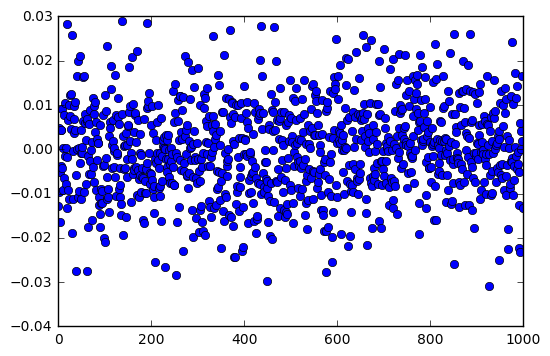

In [4]:
plt.plot(data, 'o')

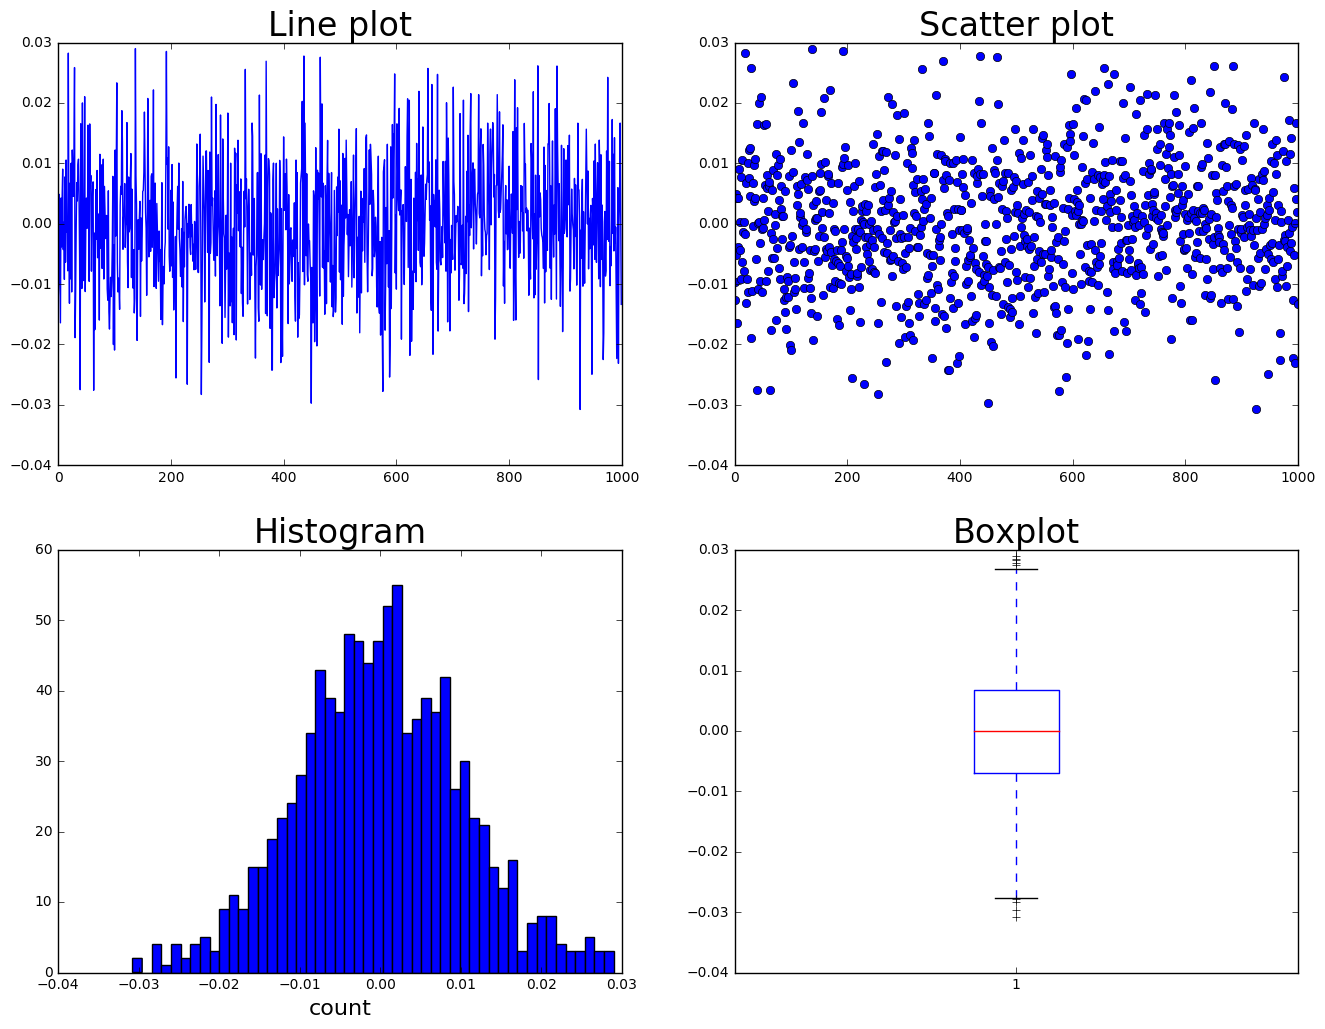

In [5]:
fig = plt.figure(figsize=(16,12))

ax = fig.add_subplot(2,2,1)
ax.plot(data)
ax.set_title('Line plot', size=24)

ax = fig.add_subplot(2,2,2)
ax.plot(data, 'o')
ax.set_title('Scatter plot', size=24)

ax = fig.add_subplot(2,2,3)
ax.hist(data, bins=50)
ax.set_title('Histogram', size=24)
ax.set_xlabel('count', size=16)

ax = fig.add_subplot(2,2,4)
ax.boxplot(data)
ax.set_title('Boxplot', size=24)

## Pandas plotting

In [6]:
dataseries = pd.Series(data)

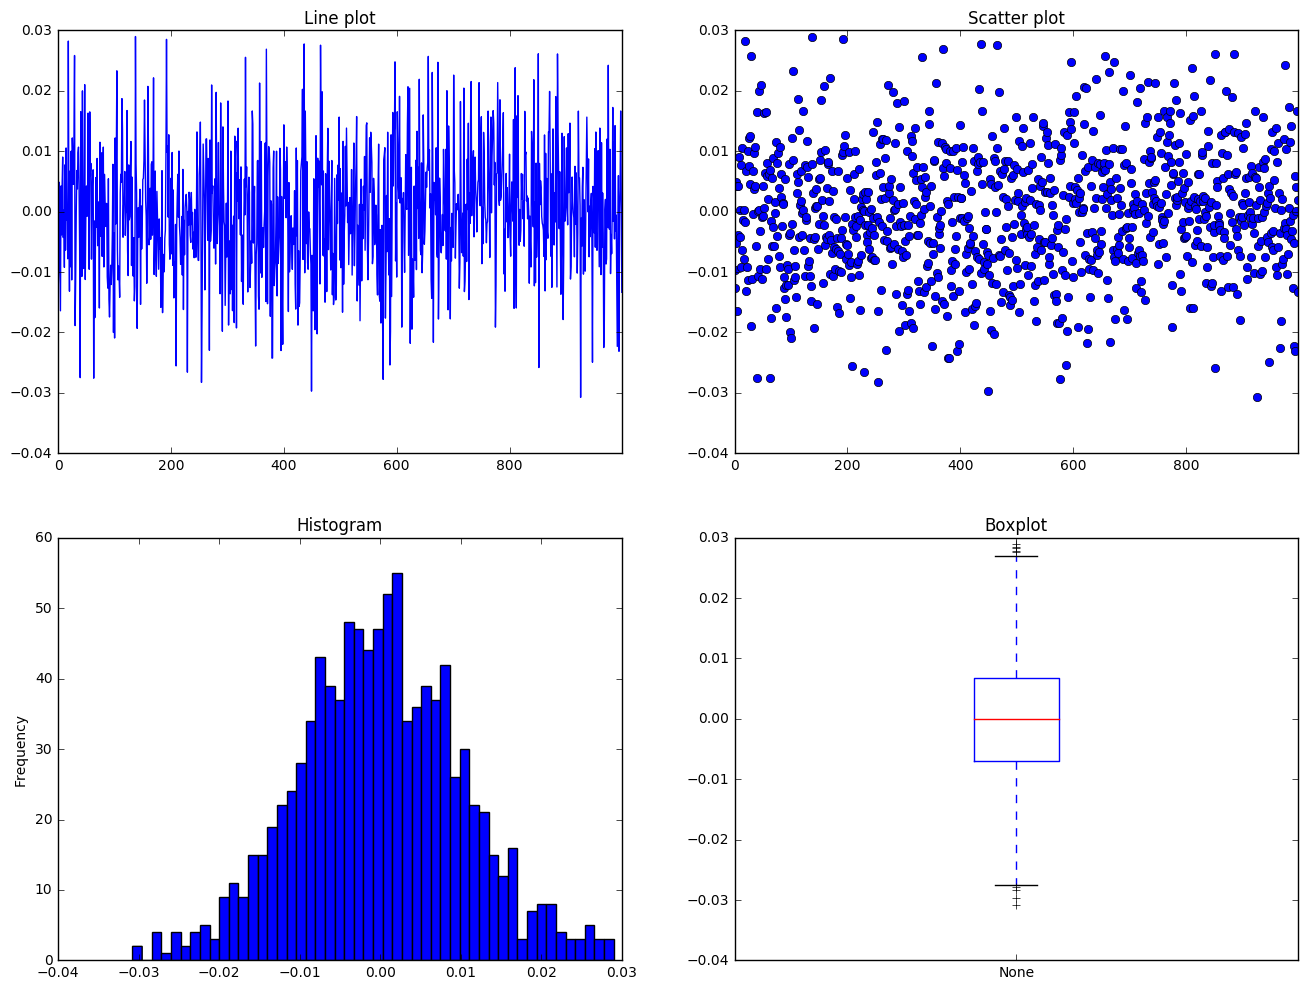

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(16,12))

dataseries.plot(ax=ax[0][0],
                title='Line plot')

dataseries.plot(ax=ax[0][1],
                style='o',
                title='Scatter plot')

dataseries.plot(ax=ax[1][0],
                kind='hist',
                bins=50,
                title='Histogram'
               )

dataseries.plot(ax=ax[1][1],
                kind='box',
                title='Boxplot'
               )

## Advanced plots

### Pie chart

In [8]:
categories = dataseries > 0.01

In [9]:
categories.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [11]:
vc = categories.value_counts()
vc

False    837
True     163
dtype: int64

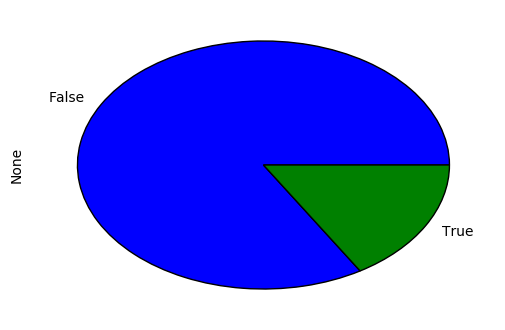

In [12]:
vc.plot(kind='pie')

## Hexbin plot

Hexbin plots are useful to inspect 2D distriibutions

In [13]:
data = np.vstack([np.random.normal((0, 0), 2, size=(2000, 2)),
                  np.random.normal((9, 9), 3, size=(2000, 2))
                  ])

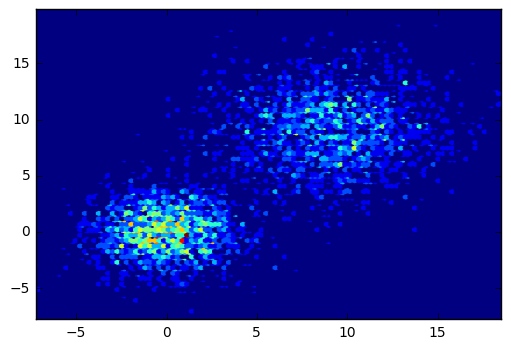

In [14]:
plt.hexbin(data[:,0], data[:,1])

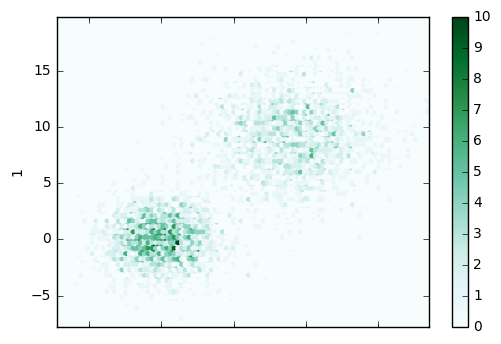

In [15]:
pd.DataFrame(data).plot(kind='hexbin', x=0, y=1)

## Interactive notebook plotting

Jupyter offers interactive plotting through the magic command `%matplotlib notebook`.

If you see nothing just run the next cell again.

In [18]:
%matplotlib notebook

<IPython.core.display.Javascript object>


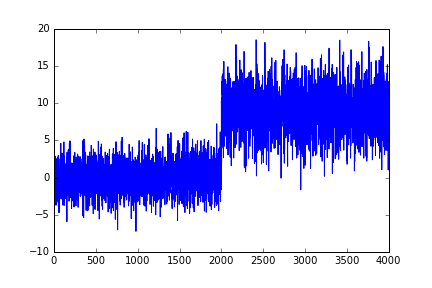

In [20]:
fig = plt.plot(data[:,0])

In [21]:
%matplotlib inline

## Candlestick plots

Candlestick plots are useful to plot financial data

In [16]:
import bokeh.plotting as bh
bh.output_notebook()

ImportError: No module named bokeh.plotting

In [17]:
df = pd.read_csv('../data/tesla-2012-2015.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 7 columns):
Date         942 non-null object
Open         942 non-null float64
High         942 non-null float64
Low          942 non-null float64
Close        942 non-null float64
Volume       942 non-null int64
Adj Close    942 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 51.6+ KB


In [19]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,28.940001,29.500000,27.650000,28.080000,928100,28.080000
1,2012-01-04,28.209999,28.670000,27.500000,27.709999,630100,27.709999
2,2012-01-05,27.760000,27.930000,26.850000,27.120001,1005500,27.120001
3,2012-01-06,27.200001,27.790001,26.410000,26.910000,986300,26.910000
4,2012-01-09,27.000000,27.490000,26.120001,27.250000,897000,27.250000


In [20]:
df["Date"] = pd.to_datetime(df["Date"])

mids = (df['Open'] + df['Close'])/2
spans = abs(df['Close']-df['Open'])

inc = df['Close'] > df['Open']
dec = df['Open'] > df['Close']
w = 12*60*60*1000 # half day in ms


p = bh.figure(x_axis_type="datetime", plot_width=800,
              x_axis_label='Time', y_axis_label='Price (USD)', title = "TSLA Candlestick")

p.segment(df.Date, df.High, df.Date, df.Low, color="black")
p.rect(df.Date[inc], mids[inc], w, spans[inc], fill_color="#D5E1DD", line_color="black")
p.rect(df.Date[dec], mids[dec], w, spans[dec], fill_color="#F2583E", line_color="black")


p.xaxis.major_label_orientation = np.pi/4
p.grid.grid_line_alpha=0.3
bh.show(p)

NameError: name 'bh' is not defined

## Exercises:

1)
- load the dataset: data/international-airline-passengers.csv
- inspect it using the .info() and .head() commands
- set the index to be a datetime index using the set_index() and to_datetime() methods
- choose the appropriate plot and display the data
- choose appropriate scale
- label the axes
- discuss with your neighbor

2)
- load the dataset: data/weight-height.csv
- inspect it
- plot it using a scatter plot
- separate the male and female population by color (review the 00_pandas_review.ipynb to find out how)
- label the axes
- discuss

3)
- plot the histogram of the heights for males and for females on the same plot
- use alpha to control transparency in the plot comand
- plot a vertical line at the mean using axvline

4)
- load the dataset: data/titanic-train.csv
- learn about scattermatrix here: http://pandas.pydata.org/pandas-docs/stable/visualization.html
- display the data using a scattermatrix
- discuss with your neighbor: what do you see?
